# Zadanie 1 (1 pkt)

Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

## Importy

In [66]:
using Pkg

In [67]:
#Pkg.add("Polynomials")
#Pkg.add("SpecialPolynomials")
#Pkg.add("Plots")
#Pkg.add("CSV")
#Pkg.add("DataFrames")

In [68]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames

## Wyznaczanie wielomianów Hermite'a

In [69]:
herm = [basis(Hermite, n) for n in 0:5]

6-element Vector{Hermite{Float64, :x}}:
 Hermite(1.0⋅H₀(x))
 Hermite(1.0⋅H₁(x))
 Hermite(1.0⋅H₂(x))
 Hermite(1.0⋅H₃(x))
 Hermite(1.0⋅H₄(x))
 Hermite(1.0⋅H₅(x))

## Wykresy

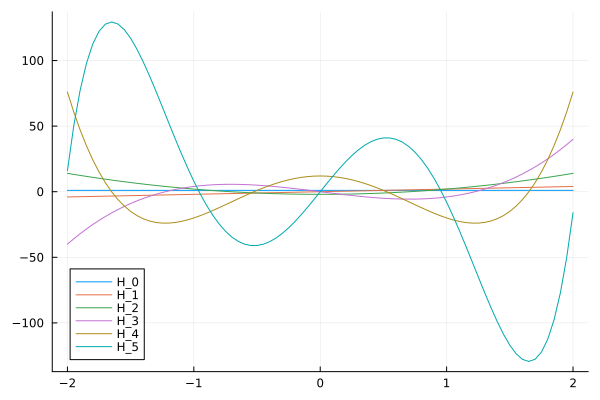

In [70]:
plot()

xs = -2:0.05:2

for i in 1:6
    ys = [herm[i](x) for x in xs]
    plot!(xs, ys, label="H_" * string(i-1)) 
end

plot!()

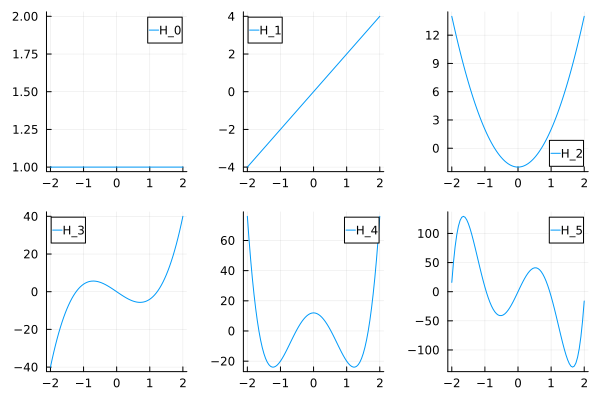

In [71]:
herm_plots = []

for i in 1:6
    ys = [herm[i](x) for x in xs]
    push!(herm_plots, plot(xs, ys, label="H_" * string(i-1)))
end

plot(herm_plots...)

# Zadanie 2  (1 pkt)

Narysować 6 pierwszych funkcji bazowych

## Funkcje bazowe

In [72]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

## Wykresy

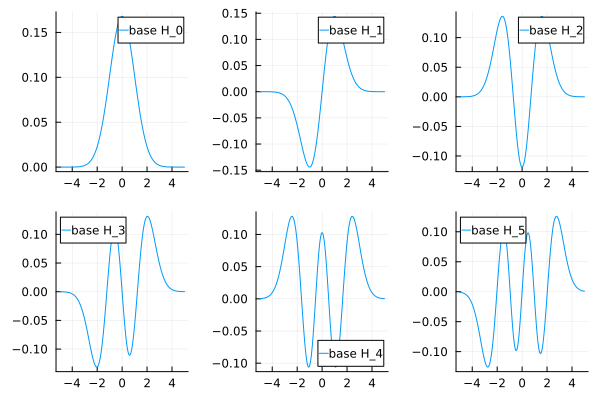

In [73]:
herm_plots = []

xs = -5:0.05:5

for i in 1:6
    ys = base_fun(i-1, xs)
    push!(herm_plots, plot(xs, ys, label="base H_" * string(i-1)))
end

plot(herm_plots...)

# Zadanie 3  (1 pkt)

Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

## Funkcja bezwagowa

In [93]:
function base_fun_weightless(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    
    # normalize to have norm 1
    if norm
        return normalize(H_k)
    end
    return H_k
end

base_fun_weightless (generic function with 2 methods)

## Wyliczenia

In [94]:
xs = -5:0.1:5

bases = [base_fun(n-1, xs) for n in 1:6]

dot_bases = Array{Float64, 2}(undef, 6, 6)

for (i, b_i) in enumerate(bases) 
    for (j, b_j) in enumerate(bases)
        dot_bases[i,j] = dot(b_i, b_j)
    end
end

dot_bases

6×6 Matrix{Float64}:
  1.0           1.17804e-17  -3.25356e-11  …  -4.52405e-10   2.83568e-17
  1.17804e-17   1.0           8.46587e-18     -1.2455e-19   -9.92118e-9
 -3.25356e-11   8.46587e-18   1.0             -1.67261e-8   -1.7485e-18
  1.85612e-18  -9.61163e-10  -7.22228e-18     -2.57256e-18  -2.04018e-7
 -4.52405e-10  -1.2455e-19   -1.67261e-8       1.0           2.68944e-17
  2.83568e-17  -9.92118e-9   -1.7485e-18   …   2.68944e-17   1.0

In [95]:
bases_weightless = [base_fun_weightless(n-1, xs) for n in 1:6]

dot_bases_weightless = Array{Float64, 2}(undef, 6, 6)

for (i, b_i) in enumerate(bases_weightless) 
    for (j, b_j) in enumerate(bases_weightless)
        dot_bases_weightless[i,j] = dot(b_i, b_j)
    end
end

dot_bases_weightless

6×6 Matrix{Float64}:
 1.0           0.0           0.724931     …   0.570438      6.93889e-18
 0.0           1.0          -6.93889e-18     -2.77556e-17   0.786828
 0.724931     -6.93889e-18   1.0              0.948299     -2.77556e-17
 6.93889e-18   0.900225     -3.46945e-17      5.55112e-17   0.96734
 0.570438     -2.77556e-17   0.948299         1.0          -1.38778e-17
 6.93889e-18   0.786828     -2.77556e-17  …  -1.38778e-17   1.0

# Zadanie 4  (1 pkt)

Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

## Wczytywanie pliku csv

In [107]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);

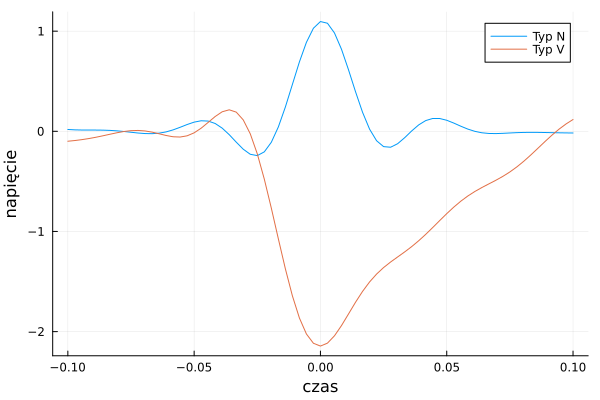

In [108]:
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

In [123]:
# Definicja węzłów
xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV
yy_ekgN = ekg_data.signalN;

In [124]:
n = 10;

In [125]:
bases = [base_fun(i-1, xx_ekg) for i in 1:n]
coefficients_ekgV = [dot(yy_ekgV, bases[i]) for i in 1:n]
coefficients_ekgN = [dot(yy_ekgN, bases[i]) for i in 1:n];

## Typ V

In [126]:
y_apps_ekgV = [coefficients_ekgV[i] .* bases[i] for i in 1:n]

for i in 2:n
    y_apps_ekgV[i] += y_apps_ekgV[i-1]
end

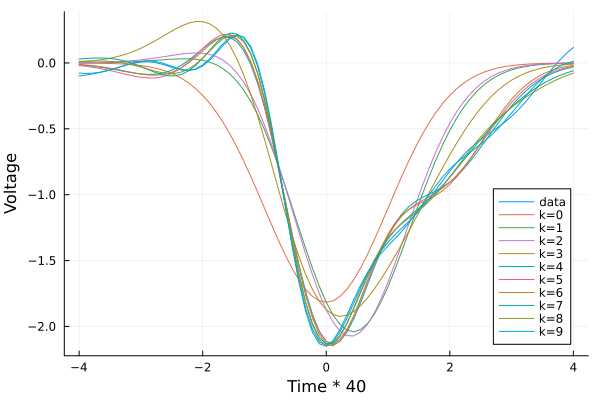

In [127]:
plot(xx_ekg, yy_ekgV, label="data", ylabel="Voltage", xlabel="Time * 40")
for i in 1:n
    plot!(xx_ekg, y_apps_ekgV[i], label="k="*string(i-1))
end
plot!()

## Typ N

In [128]:
y_apps_ekgN = [coefficients_ekgN[i] .* bases[i] for i in 1:n]

for i in 2:n
    y_apps_ekgN[i] += y_apps_ekgN[i-1]
end

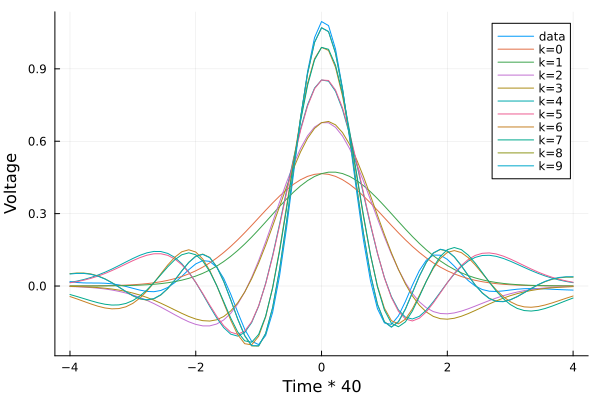

In [129]:
plot(xx_ekg, yy_ekgN, label="data", ylabel="Voltage", xlabel="Time * 40")
for i in 1:n
    plot!(xx_ekg, y_apps_ekgN[i], label="k="*string(i-1))
end
plot!()

# Zadanie 5  (1 pkt)

Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [ ]:
## Błąd średniokwadratowy

In [130]:
using Statistics;

In [131]:
mse(y1, y2) = mean((y1-y2).^2);

In [132]:
mse_ekgN = [mse(yy_ekgN, y_apps_ekgN[i]) for i in 1:n]
mse_ekgV = [mse(yy_ekgV, y_apps_ekgV[i]) for i in 1:n]

10-element Vector{Float64}:
 0.1675380359890898
 0.062058793472696924
 0.060652867414550976
 0.04008843785445875
 0.006383463796395047
 0.006081291954185556
 0.005854964251436245
 0.003471290140341323
 0.0032469317824282587
 0.0005892396935529146

## Typ N

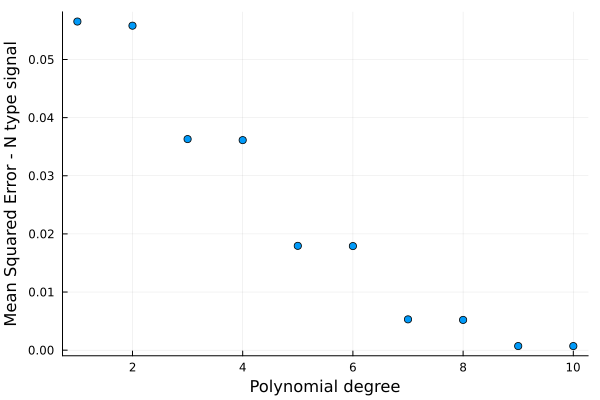

In [133]:
scatter(1:n, mse_ekgN, ylabel="Mean Squared Error - N type signal", xlabel="Polynomial degree", legend=false)

## Typ V

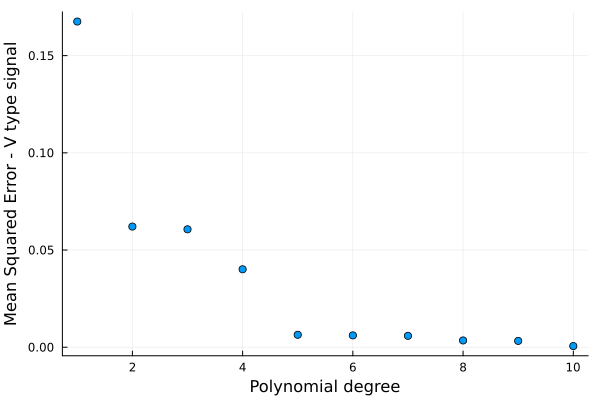

In [134]:
scatter(1:n, mse_ekgV, ylabel="Mean Squared Error - V type signal", xlabel="Polynomial degree", legend=false)

Wydaje się, że jeśli chcemy robić coś dalej z wynikami aproksymacji, to powinniśmy użyć takiego stopnia, aby błąd średniokwadratowy był jak najmniejszy przy stosunkowo niskim stopniu wielomianu